In [1]:
import nltk
from nltk.book import *
from nltk.corpus import gutenberg
from nltk.corpus import brown
from nltk.corpus import webtext
from nltk.corpus import state_union
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import random
from nltk.corpus import udhr

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**1. Create a variable ** `phrase` ** containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.**

In [2]:
phrase = ['hello', 'natural', 'language', 'processing']
phrase.append('python')
print(phrase + phrase)
print(phrase * 3)
print(phrase[0])
print(phrase[1:])
print(sorted(phrase))

['hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python']
['hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python']
hello
['natural', 'language', 'processing', 'python']
['hello', 'language', 'natural', 'processing', 'python']


**2. Use the corpus module to explore ** `austen-persuasion.txt`**. How many word tokens does this book have? How many word types?**

In [3]:
persuasion = gutenberg.words('austen-persuasion.txt')
print(len([word for word in persuasion if word.isalpha()]))
print(len(set(word.lower() for word in persuasion if word.isalpha())))

84121
5739


**3. Use the Brown corpus reader ** `nltk.corpus.brown.words()` ** or the Web text corpus reader ** `nltk.corpus.webtext.words()` ** to access some sample text in two different genres.**

In [4]:
print(brown.words(categories='reviews'))
print(brown.words(categories='humor'))
print(webtext.words(fileids='firefox.txt'))

['It', 'is', 'not', 'news', 'that', 'Nathan', ...]
['It', 'was', 'among', 'these', 'that', 'Hinkle', ...]
['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]


**4. Read in the texts of the ** *State of the Union* ** addresses, using the ** `state_union` ** corpus reader. Count occurrences of ** `men`**,** `women`**, and** `people` ** in each document. What has happened to the usage of these words over time?**

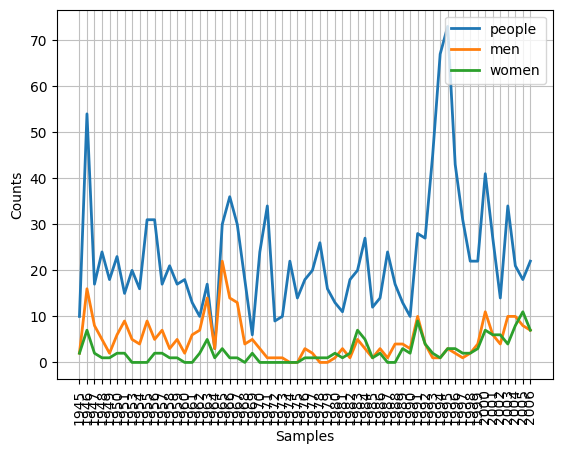

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [5]:
cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in state_union.fileids()
          for w in state_union.words(fileid)
          for target in ['men', 'women', 'people']
          if w.lower().startswith(target))
cfd.plot()

**5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: ** `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`**, and ** `substance_holonyms()` **.**

In [6]:
computer = wn.synset('computer.n.01')
print(computer.part_meronyms())
print(computer.part_holonyms())
print()

people = wn.synset('people.n.01')
print(people.member_meronyms())
print(people.member_holonyms())
print()

paper = wn.synset('paper.n.01')
print(paper.substance_meronyms())

[Synset('busbar.n.01'), Synset('cathode-ray_tube.n.01'), Synset('central_processing_unit.n.01'), Synset('chip.n.07'), Synset('computer_accessory.n.01'), Synset('computer_circuit.n.01'), Synset('data_converter.n.01'), Synset('disk_cache.n.01'), Synset('diskette.n.01'), Synset('hardware.n.03'), Synset('keyboard.n.01'), Synset('memory.n.04'), Synset('monitor.n.04'), Synset('peripheral.n.01')]
[Synset('platform.n.03')]

[Synset('person.n.01')]
[Synset('world.n.08')]

[Synset('cellulose.n.01')]


**6. In the discussion of comparative wordlists, we created an object called ** `translate` ** which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?**

If there're some words both appear in German and Spanish, then the dictionary would have ambiguity.
Add 'de'/'es' before the words and use that as keys in the dictionary.

**7. According to Strunk and White's ** *Elements of Style* **, the word ** *however* **, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: ** *However you advise him, he will probably do as he thinks best.* **(http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the ** *LanguageLog* ** posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html**

In [7]:
nltk.Text(persuasion).concordance('However')

Displaying 25 of 89 matches:
onceited , silly father . She had , however , one very intimate friend , a sens
early custom . But these measures , however good in themselves , were insuffici
ellynch Hall was to be let . This , however , was a profound secret , not to be
t immediate neighbourhood , which , however , had not suited him ; that acciden
e dues of a tenant . It succeeded , however ; and though Sir Walter must ever l
h , the former curate of Monkford , however suspicious appearances may be , but
good character and appearance ; and however Lady Russell might have asked yet f
siness no evil . She was assisted , however , by that perfect indifference and 
h the others . Something occurred , however , to give her a different duty . Ma
 , but can never alter plain ones . However , at any rate , as I have a great d
l what is due to you as my sister . However , we may as well go and sit with th
o means of her going . She wished , however to see the Crofts , and was glad to
ithout any 

**8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).**

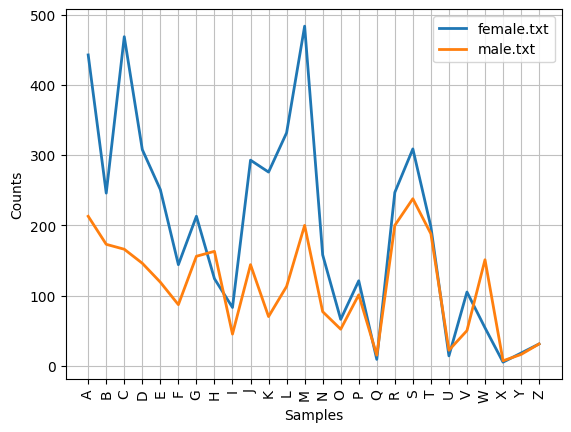

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [8]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
          (fileid, name[0])
          for fileid in names.fileids()
          for name in names.words(fileid))
cfd.plot()

From the figure, we can find that 'w' are more frequent for males.

**9. Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as ** *monstrous* ** in ** *Moby Dick* ** and in ** *Sense and Sensibility* **?**

In [9]:
news_text = brown.words(categories='news')
romance_text = brown.words(categories='romance')
print("Vocabulary of news:  ", len(set(news_text)))
print("Vocabulary of romance:", len(set(romance_text)))
print("---------------------------")
print("Vocabulary richness of news:\t", len(set(news_text)) / len(news_text))
print("Vocabulary richness of romance:\t", len(set(romance_text)) / len(romance_text))
print("----------------------------------------------------")
print("'Address' in news:")
nltk.Text(news_text).similar('address')
print()
print("'Address' in romance:")
nltk.Text(romance_text).similar('address')

Vocabulary of news:   14394
Vocabulary of romance: 8452
---------------------------
Vocabulary richness of news:	 0.14314696580941583
Vocabulary richness of romance:	 0.12070492131044529
----------------------------------------------------
'Address' in news:
administration legislature date state welfare administrators wife
daughter back he texas speaker face first battle congress just down
bill lawyer

'Address' in romance:
mass boredom sounds door smell bay dogs heat dead wife bill front back
first place thought head smoothness taste passion


**10. Read the BBC News article: ** *UK's Vicky Pollards 'left behind'* ** http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on ** *LanguageLog* **, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.**

Word types: 20  
Word tokens: `len(text)`  
The proportion is close to zero.  
The teen language is simplified nowadays.

**11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?**

In [10]:
# the code is a bit different from that in the book
# because I convert the words to lower case
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd = nltk.ConditionalFreqDist(
            (genre, word.lower())                                               # to count the Uppercased words as well, or the statistics would be inconsistent
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']         # genres = brown.categories()
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    94    87    93    38    53   389 
       religion    84    59    79    12    54    72 
        hobbies   276    59   143    22    84   269 
science_fiction    16    49     4    12     8    17 
        romance    79   195    11    51    46    49 
          humor    17    33     8     8     9    13 


In news, many events would lead to predicable consequences, so the use of 'will' is most frequent.  
In religion, the use of modals are of little difference.  
In hobbies, we can often benefit from our hobbies and get something. Thus, the use of 'can', 'may' and 'will' is high.  
In science_fiction and humor, the use of modals is rare. There contexts generally don't need modals.  
In romance, the use of 'could' is frequent maybe because it's tactful.  
Well, these are just my personal idea. 

**12. The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?**

In [11]:
# entries = nltk.corpus.cmudict.entries()          to count distinct, use dict() rather than entries()
prondict = nltk.corpus.cmudict.dict()
print('Distinct words:', len(prondict))

# count words in the dictionary that have more than one possible pronunciation
# iterate over the dict and find those whose values' length is greater than 1
wordPron = 0
for key in prondict:
    if len(prondict[key]) > 1:
        wordPron += 1
print('Fractions of words with more than one possible pronunciation:', wordPron / len(prondict))

Distinct words: 123455
Fractions of words with more than one possible pronunciation: 0.07485318537118789


**13. What percentage of noun synsets have no hyponyms? You can get all noun synsets using** `wn.all_synsets('n')`.

In [12]:
noun_synsets = len(list(wn.all_synsets('n')))               # the number of noun synsets
cnt = 0                                                     # counter for noun synsets with no hyponyms
for synset in wn.all_synsets('n'):
    if (synset.hyponyms() == []):
        cnt += 1
print(cnt / noun_synsets)

0.7967119283931072


**14. Define a function ** `supergloss(s)` ** that takes a synset ** `s` ** as its argument and returns a string consisting of the concatenation of the definition of ** `s`**, and the definitions of all the hypernyms and hyponyms of ** `s`**.**

In [13]:
def supergloss(s):
    defis = ''
    defis = defis + s.name() + ': ' + s.definition() + '\n'
    for synset in s.hypernyms():
        defis = defis + synset.name() + ': ' + synset.definition() + '\n'
    for synset in s.hyponyms():
        defis = defis + synset.name() + ': ' + synset.definition() + '\n'
    return defis

In [14]:
print(supergloss(computer))

computer.n.01: a machine for performing calculations automatically
machine.n.01: any mechanical or electrical device that transmits or modifies energy to perform or assist in the performance of human tasks
analog_computer.n.01: a computer that represents information by variable quantities (e.g., positions or voltages)
digital_computer.n.01: a computer that represents information by numerical (binary) digits
home_computer.n.01: a computer intended for use in the home
node.n.08: (computer science) any computer that is hooked up to a computer network
number_cruncher.n.02: a computer capable of performing a large number of mathematical operations per second
pari-mutuel_machine.n.01: computer that registers bets and divides the total amount bet among those who won
predictor.n.03: a computer for controlling antiaircraft fire that computes the position of an aircraft at the instant of a shell's arrival
server.n.03: (computer science) a computer that provides client stations with access to fil

**15. Write a program to find all words that occur at least three times in the Brown Corpus.**

In [15]:
wordSet = []                              # create an empty list
# frequency distribution for words in Brown Corpus
fdist = FreqDist(w.lower() for w in brown.words() if w.isalpha())
# iterate over the samples
for sample in fdist:
    if fdist[sample] >=3:
        wordSet.append(sample)            # add to the list the the frequency is greater than or equal to 3
# print(wordSet)

**16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (** `nltk.corpus.brown.categories()` **). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?**

In [16]:
for category in brown.categories():
    tokens = len(brown.words(categories=category))
    types = len(set(brown.words(categories=category)))
    diversity = types / tokens                               
    # the computation of diversity in the second version of the book seems to be different to that in the first version
    # I just use the second version's calculation formula
    print(category, diversity)

adventure 0.1279743878169075
belles_lettres 0.10642071451679992
editorial 0.16054152327770924
fiction 0.1358194136199042
government 0.11667641228232811
hobbies 0.14493897625842492
humor 0.23125144042406084
learned 0.09268890745953554
lore 0.13148804612915801
mystery 0.12212912592488936
news 0.14314696580941583
religion 0.1617553745018909
reviews 0.21192020440251572
romance 0.12070492131044529
science_fiction 0.22342778161713892


The genre `learned`(Mosteller: *Probability with Statistical Applications*) has the lowest diversity.

**17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.**

In [17]:
def find_50_most_frequent_words(text):
    fdist = FreqDist(w.lower() for w in text if w.isalpha() and w.lower() not in stopwords.words('english'))
    return fdist.most_common(50)

find_50_most_frequent_words(text1)

[('whale', 1226),
 ('one', 921),
 ('like', 647),
 ('upon', 566),
 ('man', 527),
 ('ship', 518),
 ('ahab', 511),
 ('ye', 472),
 ('sea', 455),
 ('old', 450),
 ('would', 432),
 ('though', 384),
 ('head', 345),
 ('yet', 345),
 ('boat', 336),
 ('time', 334),
 ('long', 333),
 ('captain', 329),
 ('still', 312),
 ('great', 306),
 ('said', 304),
 ('two', 298),
 ('must', 283),
 ('seemed', 283),
 ('white', 281),
 ('last', 277),
 ('see', 272),
 ('thou', 271),
 ('way', 271),
 ('whales', 268),
 ('stubb', 257),
 ('queequeg', 252),
 ('little', 249),
 ('round', 247),
 ('three', 245),
 ('say', 244),
 ('men', 244),
 ('sperm', 244),
 ('may', 240),
 ('first', 235),
 ('every', 232),
 ('well', 230),
 ('us', 228),
 ('much', 223),
 ('could', 216),
 ('good', 216),
 ('hand', 214),
 ('side', 208),
 ('ever', 206),
 ('never', 206)]

**18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.**

In [18]:
def find_50_most_frequent_bigrams(text):
    bigram = list(nltk.bigrams(text))
    fdist = FreqDist(b for b in bigram if b[0].isalpha() and b[1].isalpha()
                                      and b[0] not in stopwords.words('english') 
                                      and b[1] not in stopwords.words('english')) 
    return fdist.most_common(50)

find_50_most_frequent_bigrams(text1)

[(('Sperm', 'Whale'), 118),
 (('Moby', 'Dick'), 83),
 (('old', 'man'), 80),
 (('White', 'Whale'), 74),
 (('I', 'say'), 71),
 (('Captain', 'Ahab'), 61),
 (('sperm', 'whale'), 55),
 (('said', 'I'), 52),
 (('I', 'thought'), 44),
 (('I', 'know'), 43),
 (('Right', 'Whale'), 38),
 (('I', 'could'), 36),
 (('But', 'I'), 36),
 (('I', 'think'), 34),
 (('ye', 'see'), 34),
 (('thought', 'I'), 32),
 (('I', 'would'), 32),
 (('Captain', 'Peleg'), 32),
 (('cried', 'Ahab'), 32),
 (('white', 'whale'), 31),
 (('I', 'must'), 29),
 (('one', 'hand'), 28),
 (('I', 'saw'), 27),
 (('I', 'see'), 24),
 (('I', 'shall'), 24),
 (('cried', 'Stubb'), 23),
 (('one', 'side'), 22),
 (('every', 'one'), 21),
 (('let', 'us'), 20),
 (('never', 'mind'), 20),
 (('I', 'suppose'), 20),
 (('OF', 'THE'), 18),
 (('years', 'ago'), 18),
 (('I', 'never'), 18),
 (('I', 'mean'), 18),
 (('New', 'Bedford'), 18),
 (('At', 'last'), 18),
 (('said', 'Stubb'), 18),
 (('I', 'tell'), 17),
 (('cried', 'Starbuck'), 17),
 (('something', 'like'), 1

**19. Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.**

In [19]:
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))
genres = brown.categories()
my_words = ['love', 'like', 'peace', 'hate', 'war', 'fight', 'battle']
cfd.tabulate(conditions=genres, samples=my_words)

                  love   like  peace   hate    war  fight battle 
      adventure      9    136      5      8     18     10      3 
 belles_lettres     68    169     29      4     84     13     22 
      editorial     13     49     30      0     54     10      3 
        fiction     16    147      3      9     24      7      6 
     government      1     21     11      0      7      0      0 
        hobbies      6     66      3      0     12      1      2 
          humor      4     34      1      0      1      0      2 
        learned     13     83      8      2     16      7      4 
           lore     19     86     11      2     23     15     13 
        mystery      7    136      0      2      2      4      1 
           news      3     46      4      1     20     14     15 
       religion     13     18     19      3     14      3      1 
        reviews      7     36      2      2     17      5      3 
        romance     32    185      7      9     11      7      3 
science_fi

**20. Write a function ** `word_freq()` ** that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.**

In [20]:
def word_freq(section):
    fdist = FreqDist(w.lower() for w in brown.words(categories=section))
    return fdist

# word_freq('news')

**21. Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.**

In [21]:
def number_of_syllables(text):
    prondict = nltk.corpus.cmudict.dict()
    # syllables = []                                       # an empty list for other functions
    number = 0
    for w in text:
        if w.lower() in prondict.keys():                   # to avoid KeyError
            number += len(prondict[w.lower()][0])          # though a word may have multiple prouns, we chose the first
    return number

# len(number_of_syllables(testText))
number_of_syllables(text1)

739425

**22. Define a function ** `hedge(text)` ** which processes a text and produces a new version with the word ** 'like' ** between every third word.**

In [22]:
def hedge(text):
    new_version = list(text)                                 # convert the type from nltk.Text to list
                                                             # to take advantage of insert() method
    for i in range(2, len(text) + len(text) // 3, 3):        # loop over every third word
                                                             # remember to add the length 
        new_version.insert(i, 'like')                        # and this is a simple version that 
                                                             # regards punctuations as words
    return nltk.Text(new_version)                            # restore to nltk.Text

hedge(text1)

<Text: Moby like Dick by like Herman Melville like 1851>

**23. Zipf's Law: Let ** *f(w)* ** be the frequency of a word ** *w* ** in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. ** *f × r = k* **, for some constant ** *k* **). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.**  
a. **Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?**  
b. **Generate random text, e.g., using ** `random.choice("abcdefg ")` **, taking care to include the space character. You will need to ** `import random` ** first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?**

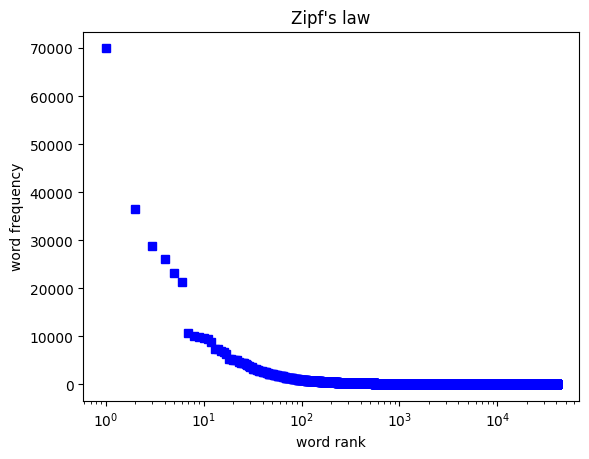

In [23]:
def zipf_law(text):
    fdist = FreqDist([w.lower() for w in text if w.isalpha()])
    fdist = fdist.most_common()                                 # sort the frequency distribution
                                                                # note that it converts the type from dict to list
    rank = []
    freq = []
    n = 1                                                       # the variable records the rank
    
    for i in range(len(fdist)):
        freq.append(fdist[i][1])                                # fdist[i][0] is the word 
                                                                # and fdist[i][1] is the corresponding frequency
        rank.append(n)
        n += 1
    
    # I use matplotlib.pyplot istead, since it seems that pylab is discouraged nowadays
    plt.plot(rank, freq, 'bs')
    plt.xscale('log')                                           # set the x axis to log scale
    # the above two statements are equivalent to: plt.semilogx(rank, freq, 'bs')

    plt.title("Zipf's law")
    plt.xlabel('word rank')
    plt.ylabel('word frequency')
    plt.show()

zipf_law(brown.words())

The frequency of 1st ranked word is approximately 2 times of the frequency of 2nd ranked word and 7 times of the frequency of 7st ranked word. (Well, the frequency of 3rd to 6th words is a bit high)  
Generally the Zipf's law applies.

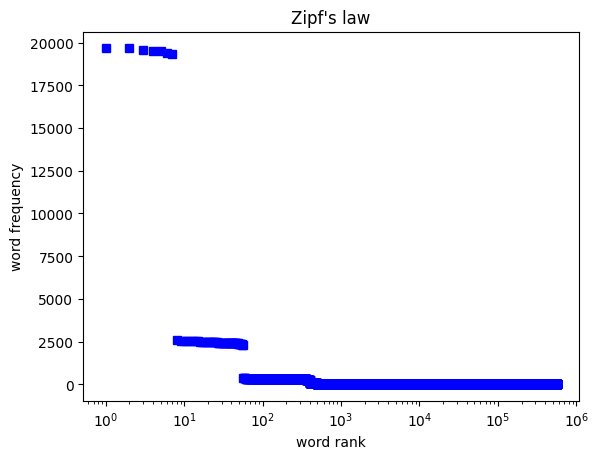

In [24]:
randomText = ''
for i in range(10000000):
    randomText = randomText + random.choice("abcdefg ")
randomWord = randomText.split()
zipf_law(randomWord)

Since the text is generated randomly, the Zipf's law does not apply. Zipf's law is a empirical law based on human language.

**24. Modify the text generation program in 2.2 further, to do the following tasks:**  
a. **Store the n most likely words in a list ** `words` ** then randomly choose a word from the list using**  `random.choice()`**. (You will need to ** `import random` ** first.)**  
b. **Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.**  
c. **Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.**

In [25]:
def generate_random_text_on_n_most_likely_words(text, n):
    fdist = FreqDist(text)
    fdist = fdist.most_common(n)
    for i in range(n):
        print(random.choice(fdist)[0], end=' ')
        
generate_random_text_on_n_most_likely_words(text1, 200)

come then that men thou he there about cried might their old like would last almost thou through been So your one - sea would boat should In way said now what made such thought do sea us . might even him these : which no ( you your through though while ' and men must two yet but they of " most The an For or Captain many with yet - can last most water us day after , deck , boat him seen more There ," again one my the their been boat can great might back those us . great little we said through Stubb ? while than long whales ' or still there among cried eyes her Captain by an would . when though ! little So thing many had did ?" thing two It even back What must So so man almost we ?" Ahab be of our - round !" were he about now white ; which - after made one man little And it had , made with t not life a ( most own now than said own we round whale with into day are men could any Ahab t never away 

In [26]:
generate_random_text_on_n_most_likely_words(brown.words(categories='news'), 200)

Jr. as or men as Mrs. new million we between an well school set or man Mr. He would also There A million her time today system only not president like , between get against against most get off new much only There U.S. Mrs. Sunday night back without Mr. under This good president people Dallas season being with per about during make said get when their its by out be about take take between off tax -- it before those being week jury both to all New been men time years , get 1 under Kennedy before into while which he In but was They members our be who night over government program take took at school two will by those one year man both take They administration But some him meeting her members President do make could into no could without did which such way up other yesterday who Mantle The cent American yesterday by that it here good United before during Jr. Texas are Monday was , since we may members much The than no Washington we 1 would do with take what home all In -- York administrat

In [27]:
generate_random_text_on_n_most_likely_words(brown.words(categories=['news','romance']), 200)

people just say by came And one They for make home first going old before little if knew before then it still out on But You over you young make just or A them their four But just here never those . must should were too men it may make most who knew went put night knew say after were can who about man can come around looked this the little asked four It told I'm must in most day left might last ( other an there man didn't all might under must has like many In my '' could for John such me thought work some into next time way then took into which make home because down felt years against And before asked my how which over one It since might of put many who -- their my : the men being what went ! should new against American school . much are say some than didn't American people while those would They state might go which work A year away work too has went they over so ; an being felt ) In both never do all John he have home said four were state out where 

**25. Define a function ** `find_language()` ** that takes a string as its argument, and returns a list of languages that have that string as a word. Use the ** `udhr` ** corpus and limit your searches to files in the Latin-1 encoding.**

In [28]:
def find_language(s):
    langs = []
    for lang in udhr.fileids():
        if lang.endswith('Latin1') and s in udhr.words(lang):
            langs.append(lang)
    return langs

In [29]:
find_language('world')

['English-Latin1', 'NigerianPidginEnglish-Latin1']

**26. What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using ** `wn.all_synsets('n')` **.**

In [30]:
# noun_synsets = len(list(wn.all_synsets('n')))               # the number of noun synsets
cnt = 0
hypos = 0
for synset in wn.all_synsets('n'):
    if synset.hyponyms() != []:
        hypos += len(synset.hyponyms())
        cnt += 1
print(hypos / cnt)

4.543820763194153


**27. The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun ** *dog* ** has 7 senses with: ** `len(wn.synsets('dog', 'n'))` **. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.**

In [31]:
# Well, I tried to store the number of senses in dict() 
# but after many trials I still failed... or say, stuck in a nested for loop.

**28. Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.**

In [32]:
def similarities(w1, w2):
    print('Path similarity:', w1.path_similarity(w2))
    print('Leacock-Chodorow similarity:', w1.lch_similarity(w2))
    print('Wu-Palmer similarity:', w1.wup_similarity(w2))

In [33]:
car = wn.synset('car.n.01')
automobile = wn.synset('automobile.n.01')
gem = wn.synset('gem.n.01')
jewel = wn.synset('jewel.n.01')
journey = wn.synset('journey.n.01')
voyage = wn.synset('voyage.n.01')
boy = wn.synset('boy.n.01')
lad = wn.synset('lad.n.01')
coast = wn.synset('coast.n.01')
shore = wn.synset('shore.n.01')
asylum = wn.synset('asylum.n.01')
madhouse = wn.synset('madhouse.n.01')
magician = wn.synset('magician.n.01')
wizard = wn.synset('wizard.n.01')
midday = wn.synset('midday.n.01')
noon = wn.synset('noon.n.01')
furnace = wn.synset('furnace.n.01')
stove = wn.synset('stove.n.01')
food = wn.synset('food.n.01')
fruit = wn.synset('fruit.n.01')
bird = wn.synset('bird.n.01')
cock = wn.synset('cock.n.01')
crane = wn.synset('crane.n.01')
tool = wn.synset('tool.n.01')
implement = wn.synset('implement.n.01')
brother = wn.synset('brother.n.01')
monk = wn.synset('monk.n.01')
oracle = wn.synset('oracle.n.01')
cemetery = wn.synset('cemetery.n.01')
woodland = wn.synset('woodland.n.01')
rooster = wn.synset('rooster.n.01')
hill = wn.synset('hill.n.01')
forest = wn.synset('forest.n.01')
graveyard = wn.synset('graveyard.n.01')
slave = wn.synset('slave.n.01')
chord = wn.synset('chord.n.01')
smile = wn.synset('smile.n.01')
glass = wn.synset('glass.n.01')
string = wn.synset('string.n.01')

In [34]:
similarities(boy, lad)

Path similarity: 0.3333333333333333
Leacock-Chodorow similarity: 2.538973871058276
Wu-Palmer similarity: 0.6666666666666666


Well, it seems that I can't get access to Miller & Charles, 1998. And the computation of Leacock-Chodorow similarity takes a long time. So here I don't compute the similarities of all the given pairs.